## Data Quality Check and Pattern Recognition

In [2]:
#importing the libraries to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
d1 = pd.read_csv("actions2load.csv")
d1

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s
...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,-1,https://www.manning.com/books/bdd-in-action-se...
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,-1,https://www.manning.com/books/bdd-in-action-se...
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,-1,https://www.google.com/
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,-1,https://www.google.com/


In [4]:
#I'm trying to copy the original dataset given with only columns that have object types
obj_d1 = d1.select_dtypes(include=['object']).copy()
obj_d1.head()

,account_id,event_time,event_type,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s


In [5]:
#I'm trying to clean up null values in the dataset given, so this code below calls up all the rows with NAN
obj_d1[obj_d1.isnull().any(axis=1)]

,account_id,event_time,event_type,additional_data
35614,30884b885298660f38c27661ea3457b3,2019-12-04 14:25:11.434,LivebookLogin,NaN
35622,d7f39385a7dbce959d061d4f5316f791,2019-12-04 14:26:04.761,LivebookLogin,NaN
35624,56b1dbad86680af40532a181e62bef26,2019-12-04 14:26:52.171,LivebookLogin,NaN
35626,5a4182a51931187b2dd3d9228a99a3a0,2019-12-04 14:27:22.766,LivebookLogin,NaN
35640,ffb14e8b6e84eb9ad09f15443be54561,2019-12-04 14:29:25.684,LivebookLogin,NaN
...,...,...,...,...
3242016,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:16:16.035,FreeContentCheckout,NaN
3242032,773a3fb24da67844b60052259672ee56,2020-06-04 04:17:30.255,FreeContentCheckout,NaN
3242033,773a3fb24da67844b60052259672ee56,2020-06-04 04:17:30.255,FreeContentCheckout,NaN
3242042,7f1ea45b6b56bcded28c484fa1e75a18,2020-06-04 04:18:11.925,LivebookLogin,NaN


In [6]:
#Checking to know the value with the most count. I need this to fill up the NAN columns
obj_d1["additional_data"].value_counts()

https://www.google.com/    676366
60s                        215130
120s                       181225
240s                       150269
480s                       110059
                            ...  
347429                          1
347430                          1
347431                          1
347432                          1
346132                          1
Name: additional_data, Length: 248390, dtype: int64

In [7]:
#I replaced the NAN values with "https://www.google.com/" which is the most common value in the additional data column
obj_d1 = obj_d1.fillna({"additional_data": "https://www.google.com/"})
obj_d1

,account_id,event_time,event_type,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s
...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,https://www.manning.com/books/bdd-in-action-se...
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,https://www.manning.com/books/bdd-in-action-se...
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,https://www.google.com/
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,https://www.google.com/


In [8]:
#I checked to see if there are still any missing values
obj_d1.isnull().sum()

account_id         0
event_time         0
event_type         0
additional_data    0
dtype: int64

In [9]:
#im trying to use label encoding method to convert the values in event_type to numbers. So first i changed the data type of event_type to category
obj_d1["event_type"] = obj_d1["event_type"].astype('category')
obj_d1.dtypes

account_id           object
event_time           object
event_type         category
additional_data      object
dtype: object

In [10]:
#then i assigned the encoded variable to a new column
obj_d1["event_type_cat"] = obj_d1["event_type"].cat.codes
obj_d1.head()

,account_id,event_time,event_type,additional_data,event_type_cat
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches,5
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s,25
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s,25
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1,22
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s,25


In [11]:
#im trying to use label encoding method to convert the values in account_id to numbers. So i also changed the data type of account_id to category

obj_d1["account_id"] = obj_d1["account_id"].astype('category')
obj_d1.dtypes

account_id         category
event_time           object
event_type         category
additional_data      object
event_type_cat         int8
dtype: object

In [12]:
#then i assigned the encoded variable to a new column
obj_d1["account_id_cat"] = obj_d1["account_id"].cat.codes
obj_d1.head()

,account_id,event_time,event_type,additional_data,event_type_cat,account_id_cat
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches,5,33714
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s,25,72798
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s,25,64207
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1,22,72798
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s,25,48227


## QUESTION 4:  Are there any extreme outliers (class imbalances) in the number of events?

In [13]:
#im trying to identify outliers
round(obj_d1.describe(), 3)

,event_type_cat,account_id_cat
count,3242076.000,3242076.000
mean,15.037,41622.464
std,7.847,19708.138
min,0.000,0.000
25%,9.000,37658.000
50%,10.000,37658.000
75%,25.000,49973.000
max,34.000,89466.000


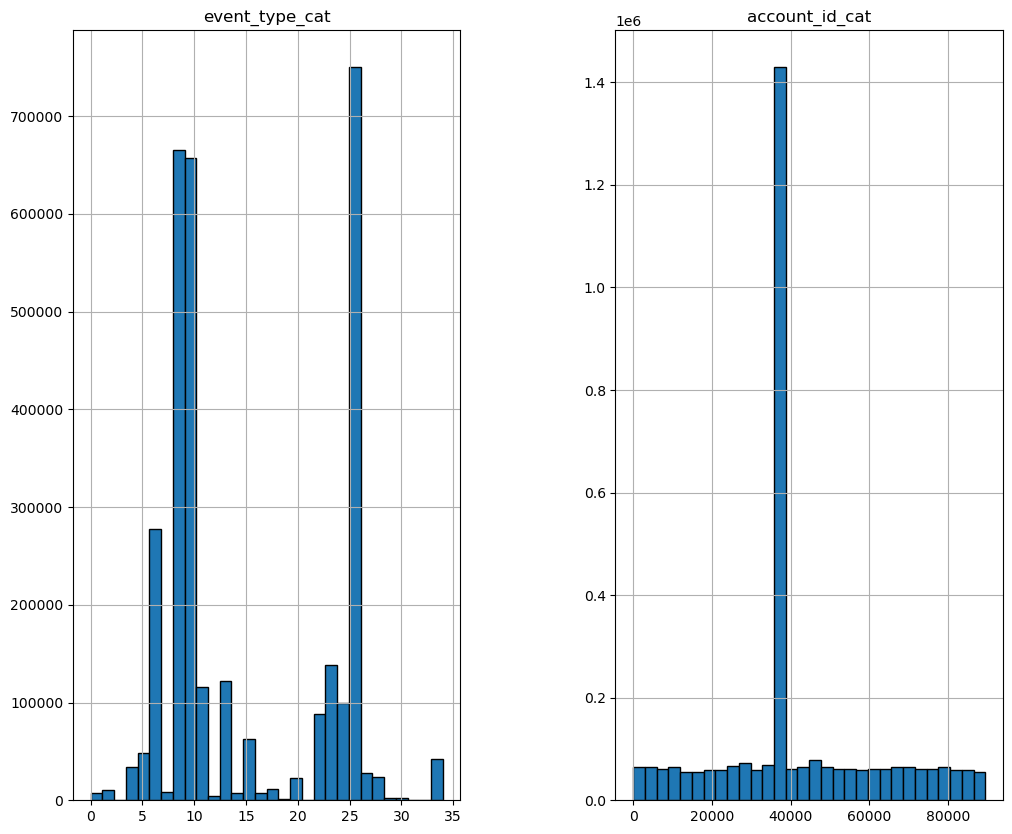

In [14]:
#Checking the distribution of the event_type variable. The histogram below is not skewed either to the left or right.
obj_d1.hist(figsize=(12, 10), bins=30, edgecolor = 'black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [15]:
#The difference between the 75% and max is not so high, so its not confiming the presence of outliers. 
#There are no potential outliers in the dataset.

Text(0.5, 1.0, 'Boxplot')

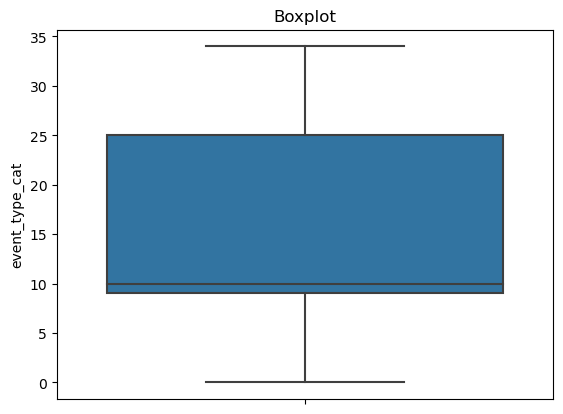

In [15]:
#boxplot to examine outliers
import seaborn as sns
sns.boxplot(y=obj_d1['event_type_cat'])
plt.title('Boxplot')

## QUESTION 1:  Do events happen equally at different times of the day or are there patterns (give visualizations)?

In [16]:
#Confirming event_time data type is integer
obj_d1['event_time'].value_counts()

2020-05-25 21:06:11.342    11
2020-04-23 16:07:05.889     9
2020-02-16 09:02:34.838     9
2020-04-13 21:57:31.173     8
2020-04-11 19:05:24.556     8
                           ..
2020-03-13 04:54:02.188     1
2020-03-13 04:54:02.189     1
2020-03-13 04:54:03.769     1
2020-03-13 04:54:03.768     1
2020-06-04 04:20:13.271     1
Name: event_time, Length: 2940583, dtype: int64

In [17]:
#converting the event_time integer data type to datetime format
obj_d1['event_time'] = pd.to_datetime(obj_d1['event_time'])
obj_d1['event_time']

0         2019-11-29 12:10:08.154
1         2019-11-29 12:10:19.962
2         2019-11-29 12:11:20.707
3         2019-11-29 12:11:41.283
4         2019-11-29 12:11:58.253
                    ...          
3242071   2020-06-04 04:19:56.485
3242072   2020-06-04 04:19:56.486
3242073   2020-06-04 04:19:59.613
3242074   2020-06-04 04:19:59.612
3242075   2020-06-04 04:20:13.271
Name: event_time, Length: 3242076, dtype: datetime64[ns]

In [18]:
#i used the code below to extract only the dates from the event_time column
obj_d1['event_date'] = obj_d1['event_time'].dt.date
obj_d1

,account_id,event_time,event_type,additional_data,event_type_cat,account_id_cat,event_date
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches,5,33714,2019-11-29
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s,25,72798,2019-11-29
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s,25,64207,2019-11-29
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1,22,72798,2019-11-29
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s,25,48227,2019-11-29
...,...,...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,https://www.manning.com/books/bdd-in-action-se...,10,37658,2020-06-04
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,https://www.manning.com/books/bdd-in-action-se...,9,37658,2020-06-04
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,https://www.google.com/,9,37658,2020-06-04
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,https://www.google.com/,10,37658,2020-06-04


In [19]:
#i used the code below to extract only the time from the event_time column
obj_d1['time_of_event'] = obj_d1['event_time'].dt.time
obj_d1

,account_id,event_time,event_type,additional_data,event_type_cat,account_id_cat,event_date,time_of_event
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches,5,33714,2019-11-29,12:10:08.154000
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s,25,72798,2019-11-29,12:10:19.962000
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s,25,64207,2019-11-29,12:11:20.707000
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1,22,72798,2019-11-29,12:11:41.283000
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s,25,48227,2019-11-29,12:11:58.253000
...,...,...,...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,https://www.manning.com/books/bdd-in-action-se...,10,37658,2020-06-04,04:19:56.485000
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,https://www.manning.com/books/bdd-in-action-se...,9,37658,2020-06-04,04:19:56.486000
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,https://www.google.com/,9,37658,2020-06-04,04:19:59.613000
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,https://www.google.com/,10,37658,2020-06-04,04:19:59.612000


In [20]:
# i used the code below to extract the hour from the event_time column
obj_d1['event_hour'] = obj_d1['event_time'].dt.hour
obj_d1

,account_id,event_time,event_type,additional_data,event_type_cat,account_id_cat,event_date,time_of_event,event_hour
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,/book/learn-dbatools-in-a-month-of-lunches,5,33714,2019-11-29,12:10:08.154000,12
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,60s,25,72798,2019-11-29,12:10:19.962000,12
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,480s,25,64207,2019-11-29,12:11:20.707000,12
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,/book/grokking-machine-learning/chapter-1,22,72798,2019-11-29,12:11:41.283000,12
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s,25,48227,2019-11-29,12:11:58.253000,12
...,...,...,...,...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,https://www.manning.com/books/bdd-in-action-se...,10,37658,2020-06-04,04:19:56.485000,4
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,https://www.manning.com/books/bdd-in-action-se...,9,37658,2020-06-04,04:19:56.486000,4
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,https://www.google.com/,9,37658,2020-06-04,04:19:59.613000,4
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,https://www.google.com/,10,37658,2020-06-04,04:19:59.612000,4


In [21]:
obj_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   account_id       category      
 1   event_time       datetime64[ns]
 2   event_type       category      
 3   additional_data  object        
 4   event_type_cat   int8          
 5   account_id_cat   int32         
 6   event_date       object        
 7   time_of_event    object        
 8   event_hour       int64         
dtypes: category(2), datetime64[ns](1), int32(1), int64(1), int8(1), object(3)
memory usage: 157.3+ MB


In [22]:
#Calculate the time intervals between events
obj_d1['Interval'] = obj_d1['event_time'].diff()
obj_d1['Interval']

0                              NaT
1           0 days 00:00:11.808000
2           0 days 00:01:00.745000
3           0 days 00:00:20.576000
4           0 days 00:00:16.970000
                    ...           
3242071     0 days 00:00:19.640000
3242072     0 days 00:00:00.001000
3242073     0 days 00:00:03.127000
3242074   -1 days +23:59:59.999000
3242075     0 days 00:00:13.659000
Name: Interval, Length: 3242076, dtype: timedelta64[ns]

In [23]:
# Calculate the mean, median, and standard deviation of the time intervals
mean_interval = obj_d1['Interval'].mean()
mean_interval

median_interval = obj_d1['Interval'].median()
std_interval = obj_d1['Interval'].std()

print('Mean interval:', mean_interval)
print('Median interval:', median_interval)
print('Standard deviation of interval:', std_interval)

Mean interval: 0 days 00:00:05.001428133
Median interval: 0 days 00:00:02.328000
Standard deviation of interval: 0 days 00:00:07.821278603


In [26]:
#This indicates that the time intervals between event_types are relatively consistent, with a mean and median interval of 
#0 days00:00:05.001428133 and 0 days 00:00:02.328000 respectively and a standard deviation of 0 days 00:00:07.821278603. This 
#suggests that events are occurring equally at different times because the mean and median are not significantly different.

In [29]:
##VISUALIZATION

In [24]:
hourly_event = obj_d1.groupby('event_hour').size().reset_index(name='count')
hourly_event

,event_hour,count
0,0,124535
1,1,110457
2,2,107778
3,3,102092
4,4,97886
5,5,106103
6,6,116446
7,7,132807
8,8,136298
9,9,140293


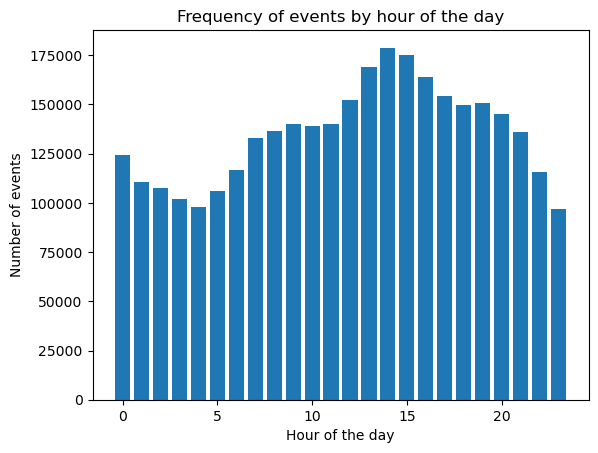

In [25]:
# Create a bar chart of event frequency by hour of the day
plt.bar(hourly_event['event_hour'], hourly_event['count'])
plt.title('Frequency of events by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of events')
plt.show()

## QUESTION 3: Are there any gaps (missing data) in the record of any events?

In [26]:
obj_d1["event_type"].isnull().sum()

0

In [32]:
#There seems to be no missing data in the events record

## QUESTION 2: Analyze “a particular account_id” for insights on how the person uses the service at different times of the day (Visualizations)

In [28]:
# Filter the DataFrame to only include rows with the desired account ID
account_id = '89f7601cb558e1c47b00a7fabb6a466c'
filtered_obj_d1 = obj_d1[obj_d1['account_id'] == account_id]
filtered_obj_d1

,account_id,event_time,event_type,additional_data,event_type_cat,account_id_cat,event_date,time_of_event,event_hour,Interval
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,960s,25,48227,2019-11-29,12:11:58.253000,12,0 days 00:00:16.970000
20,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:16:03.552,ReadingOwnedBook,1200s,25,48227,2019-11-29,12:16:03.552000,12,0 days 00:00:04.058000
54043,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:32:51.241,ReadingOwnedBook,60s,25,48227,2019-12-06,14:32:51.241000,14,0 days 00:00:01.673000
54077,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:36:53.372,ReadingOwnedBook,120s,25,48227,2019-12-06,14:36:53.372000,14,0 days 00:00:00.542000
54109,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:40:24.222,ReadingOwnedBook,240s,25,48227,2019-12-06,14:40:24.222000,14,0 days 00:00:31.910000
54251,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:57:31.000,ReadingOwnedBook,480s,25,48227,2019-12-06,14:57:31,14,0 days 00:00:11.463000
54508,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:26:16.836,ReadingOwnedBook,600s,25,48227,2019-12-06,15:26:16.836000,15,0 days 00:00:13.130000
54524,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:28:16.803,ReadingOwnedBook,720s,25,48227,2019-12-06,15:28:16.803000,15,0 days 00:00:07.903000
54577,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:33:17.430,ReadingOwnedBook,960s,25,48227,2019-12-06,15:33:17.430000,15,0 days 00:00:04.525000
54639,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:38:18.165,ReadingOwnedBook,1200s,25,48227,2019-12-06,15:38:18.165000,15,0 days 00:00:00.331000


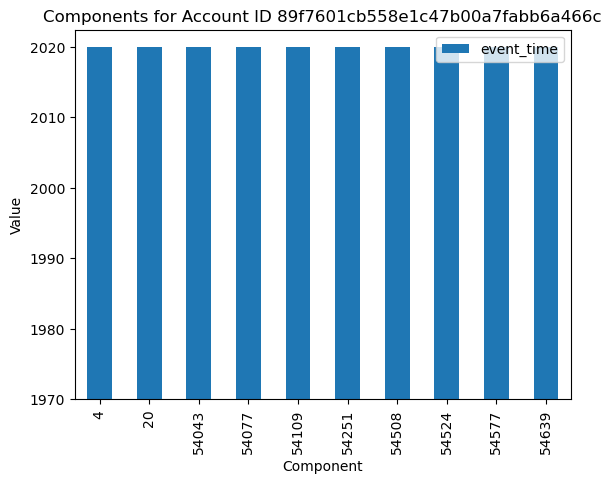

In [31]:
# Extracting the relevant components for the selected account id
components = filtered_obj_d1[['event_type', 'event_time']]

# Plotting a bar chart of the components
components.plot(kind='bar')
plt.title('Components for Account ID {}'.format(account_id))
plt.xlabel('Component')
plt.ylabel('Value')
plt.show()

In [ ]:
#Account id 89f7601cb558e1c47b00a7fabb6a466c uses the different services at almost same time of the day.